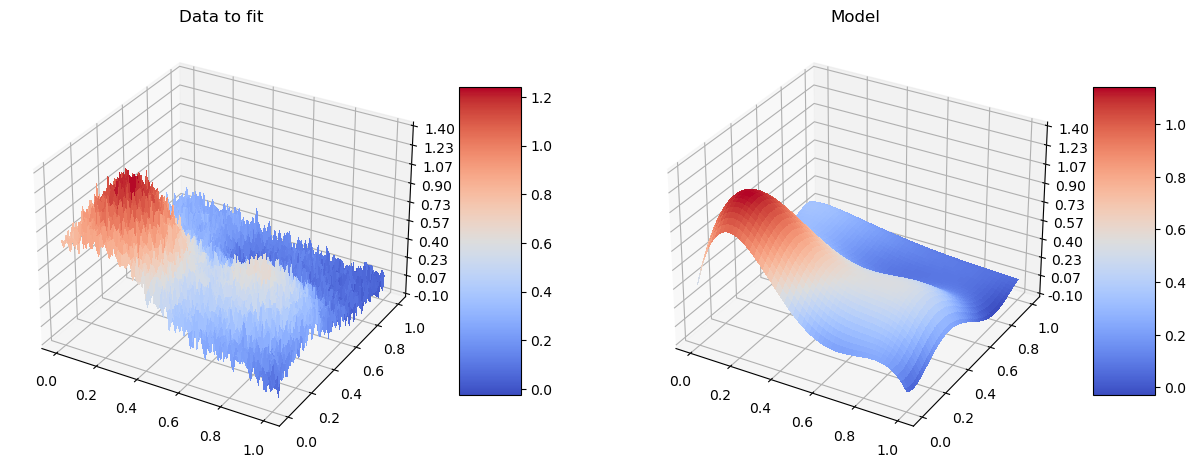

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
# np.set_printoptions(precision=2, suppress=True)



class MyStandardScaler:
    def __init__(self):
        self.mean_ = None
        self.var_ = None

    def fit(self, X):
        p = X.shape[1]
        self.mean_ = np.zeros(p)
        self.var_ = np.zeros(p)
        for i in range(p):
            self.mean_[i] = np.mean(X[:, i])
            self.var_[i] = np.var(X[:, i])

    def transform(self, X, with_std=True, with_mean=True):
        if self.mean_ is None or self.var_ is None:
            raise ValueError("Call fit first")

        if with_mean:
            X = X - self.mean_.reshape(1, -1)
        if with_std:
            X /= np.sqrt(self.var_).reshape(1, -1)
        return X

    def fit_transform(self, X, with_std=True, with_mean=True):
        self.fit(X)
        return self.transform(X, with_std, with_mean)





def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


def R2(y_data,y_model):
    return 1 - np.sum((y_data-y_model)**2)/np.sum((y_data-np.mean(y_model))**2)


def fit_beta(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y




def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4



n = 100
degree = 5
np.random.seed()





x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xx , yy = np.meshgrid(x,y)
z = FrankeFunction(xx, yy) + 0.06 *np.random.randn(n,n)
# Make data set.


fig = plt.figure(figsize=(15,8))
fig.tight_layout()
ax = fig.add_subplot(1,2,1,projection='3d')
ax.title.set_text("Data to fit")
# Plot the surface.
surf = ax.plot_surface(xx, yy, z, cmap=cm.coolwarm, # type: ignore
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)










X = np.concatenate((xx.ravel(), yy.ravel())).reshape(2,-1).T

scaler = StandardScaler()       # sklearn scaler
myScaler = MyStandardScaler()   # own implementation of standard scaler
poly = PolynomialFeatures(degree,include_bias=False)


# fit polynomial and scale
x_train, x_test, y_train, y_test = train_test_split(X, z.ravel(), test_size=0.2)
X_train = poly.fit_transform(x_train)
X_test = poly.transform(x_test)
X_train = myScaler.fit_transform(X_train)
X_test = myScaler.transform(X_test)
y_train_mean = np.mean(y_train)
y_train = y_train - y_train_mean


# fit beta
beta = fit_beta(X_train,y_train)

predict = (myScaler.transform(poly.transform(X)) @ beta) + y_train_mean 
predict = predict.reshape(n,n)



# ax = fig.gca(projection='3d')
ax = fig.add_subplot(1,2,2,projection='3d')
ax.title.set_text("Model")

surf = ax.plot_surface(xx, yy, predict, cmap=cm.coolwarm, # type: ignore
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()